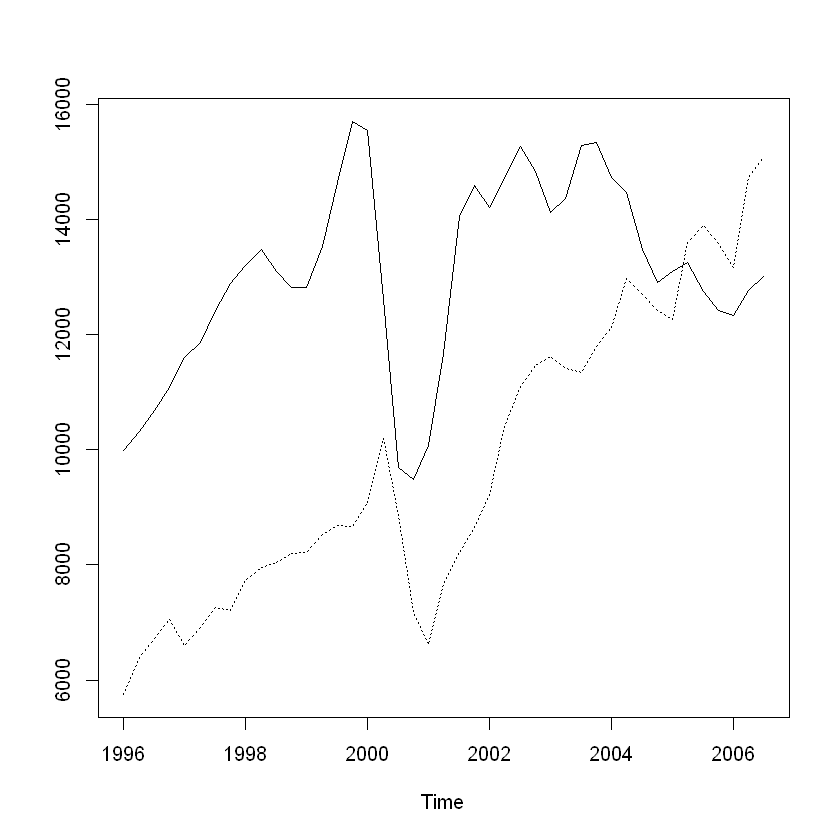

In [1]:
www <- 'https://raw.githubusercontent.com/AtefOuni/ts/master/Data/ApprovActiv.dat'

Build.dat <- read.table(www, header=T) ; attach(Build.dat)
App.ts <- ts(Approvals, start = c(1996,1), freq=4)
Act.ts <- ts(Activity, start = c(1996,1), freq=4)
ts.plot(App.ts, Act.ts, lty = c(1,3))# Building approvals (solid line) and building activity (dotted line).

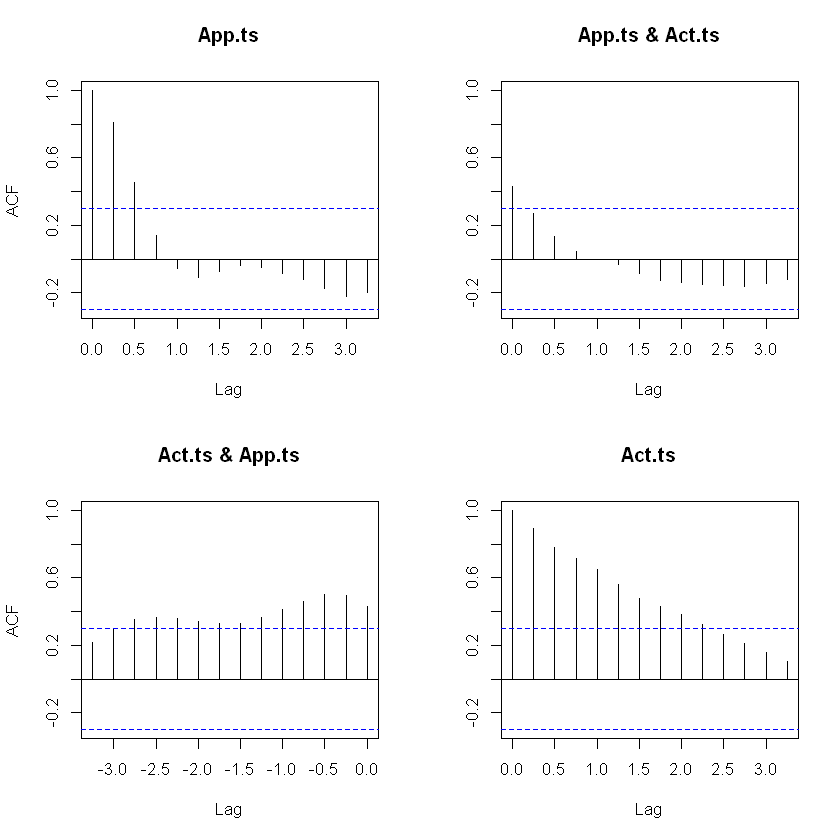

In [2]:
acf(ts.union(App.ts, Act.ts))# La función ts.union vincula series de tiempo con una frecuencia común

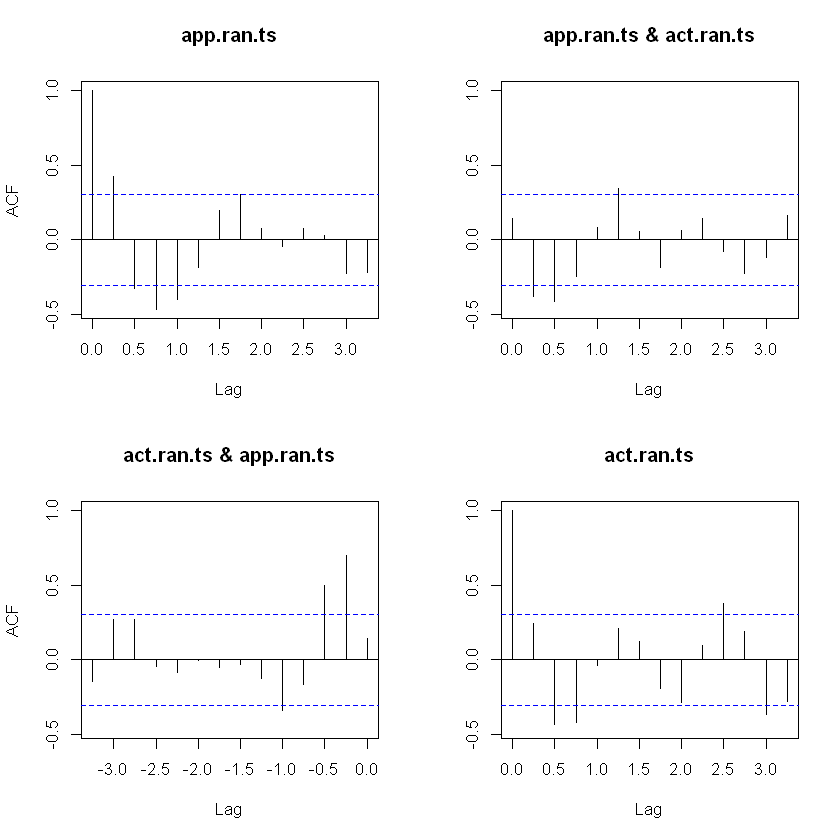

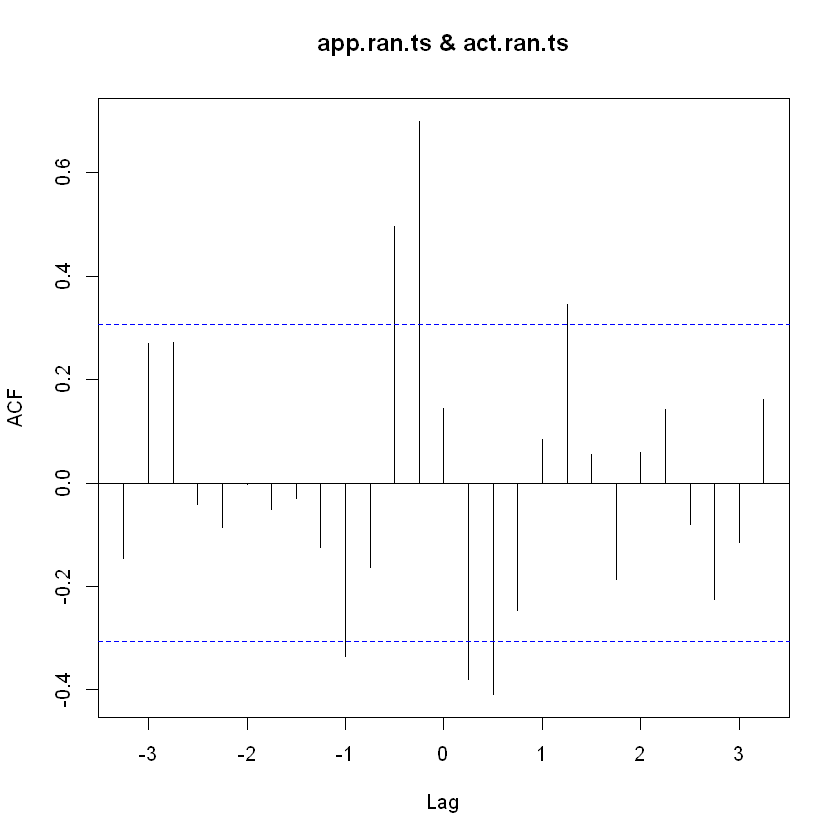

In [3]:
app.ran <- decompose(App.ts)$random
app.ran.ts <- window (app.ran, start = c(1996,3))
act.ran <- decompose (Act.ts)$random
act.ran.ts <- window (act.ran, start = c(1996,3))

acf(ts.union(app.ran.ts, act.ran.ts), na.action = na.pass)
ccf(app.ran.ts, act.ran.ts, na.action = na.pass)# muestra una relación retrasada


Autocorrelations of series 'ts.union(app.ran.ts, act.ran.ts)', by lag

, , app.ran.ts

 app.ran.ts     act.ran.ts    
  1.000 ( 0.00)  0.144 ( 0.00)
  0.427 ( 0.25)  0.699 (-0.25)
 -0.324 ( 0.50)  0.497 (-0.50)
 -0.466 ( 0.75) -0.164 (-0.75)
 -0.401 ( 1.00) -0.336 (-1.00)
 -0.182 ( 1.25) -0.124 (-1.25)
  0.196 ( 1.50) -0.031 (-1.50)
  0.306 ( 1.75) -0.050 (-1.75)
  0.078 ( 2.00) -0.002 (-2.00)
 -0.042 ( 2.25) -0.087 (-2.25)
  0.078 ( 2.50) -0.042 (-2.50)
  0.027 ( 2.75)  0.272 (-2.75)
 -0.226 ( 3.00)  0.271 (-3.00)
 -0.216 ( 3.25) -0.147 (-3.25)

, , act.ran.ts

 app.ran.ts     act.ran.ts    
  0.144 ( 0.00)  1.000 ( 0.00)
 -0.380 ( 0.25)  0.240 ( 0.25)
 -0.409 ( 0.50) -0.431 ( 0.50)
 -0.247 ( 0.75) -0.419 ( 0.75)
  0.084 ( 1.00) -0.037 ( 1.00)
  0.346 ( 1.25)  0.211 ( 1.25)
  0.056 ( 1.50)  0.126 ( 1.50)
 -0.187 ( 1.75) -0.190 ( 1.75)
  0.060 ( 2.00) -0.284 ( 2.00)
  0.142 ( 2.25)  0.094 ( 2.25)
 -0.080 ( 2.50)  0.378 ( 2.50)
 -0.225 ( 2.75)  0.187 ( 2.75)
 -0.115 ( 3.00) -0.365 ( 3.

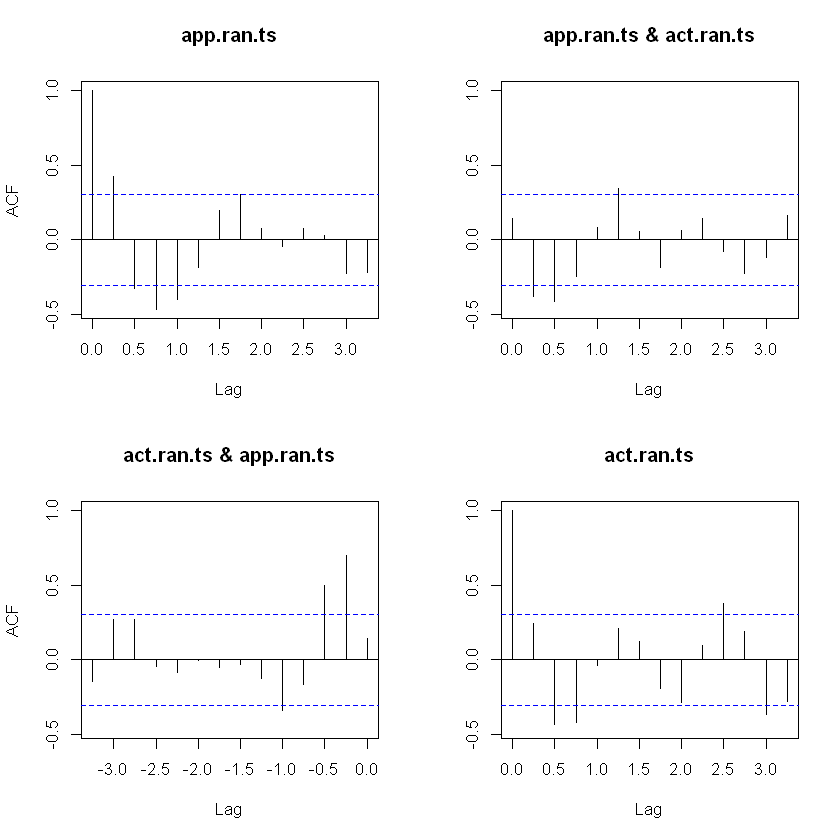


Autocorrelations of series 'X', by lag

 -3.25  -3.00  -2.75  -2.50  -2.25  -2.00  -1.75  -1.50  -1.25  -1.00  -0.75 
-0.147  0.271  0.272 -0.042 -0.087 -0.002 -0.050 -0.031 -0.124 -0.336 -0.164 
 -0.50  -0.25   0.00   0.25   0.50   0.75   1.00   1.25   1.50   1.75   2.00 
 0.497  0.699  0.144 -0.380 -0.409 -0.247  0.084  0.346  0.056 -0.187  0.060 
  2.25   2.50   2.75   3.00   3.25 
 0.142 -0.080 -0.225 -0.115  0.161 


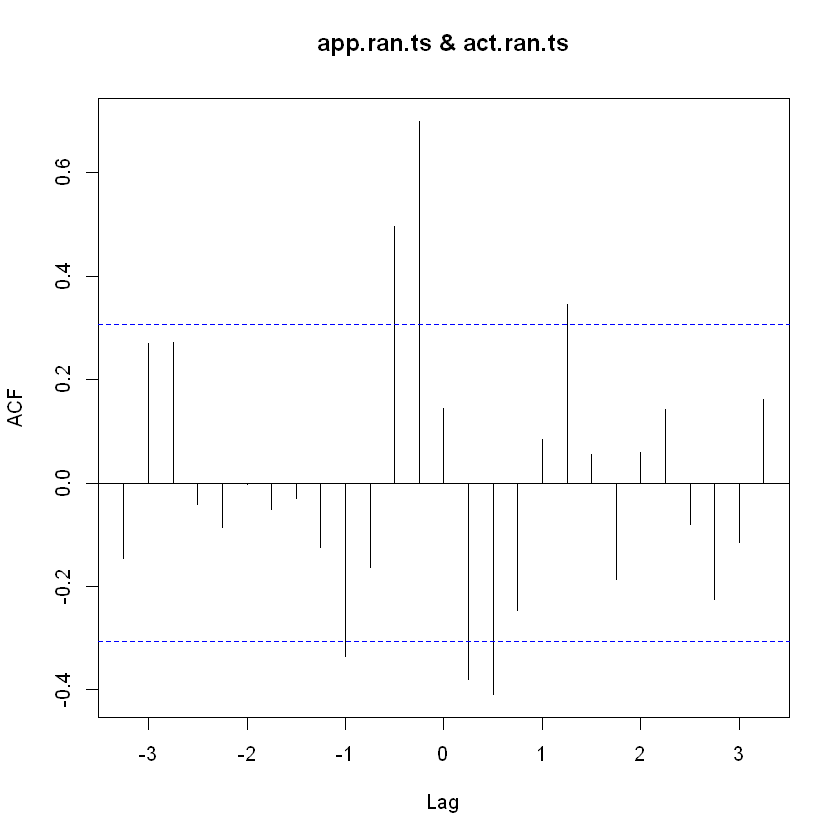

In [4]:
print(acf(ts.union(app.ran.ts, act.ran.ts), na.action = na.pass))
print(ccf(app.ran.ts, act.ran.ts, na.action = na.pass))

In [5]:
T79 <- 1:10
Tdelt <- (1:100) / 10
Sales <- c(840,1470,2110,4000, 7590, 10950, 10530, 9470, 7790, 5890)
Cusales <- cumsum(Sales)# suma acumulada

In [6]:
Bass.nls <- nls(Sales ~ M * ( ((P+Q)^2 / P) * exp(-(P+Q) * T79) ) /
                    (1+(Q/P)*exp(-(P+Q)*T79))^2, start = list(M=60630, P=0.03, Q=0.38))

# nls: non-linear least squares function

In [7]:
summary(Bass.nls)


Formula: Sales ~ M * (((P + Q)^2/P) * exp(-(P + Q) * T79))/(1 + (Q/P) * 
    exp(-(P + Q) * T79))^2

Parameters:
   Estimate Std. Error t value Pr(>|t|)    
M 6.798e+04  3.128e+03   21.74 1.10e-07 ***
P 6.594e-03  1.430e-03    4.61  0.00245 ** 
Q 6.381e-01  4.140e-02   15.41 1.17e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 727.2 on 7 degrees of freedom

Number of iterations to convergence: 8 
Achieved convergence tolerance: 7.323e-06


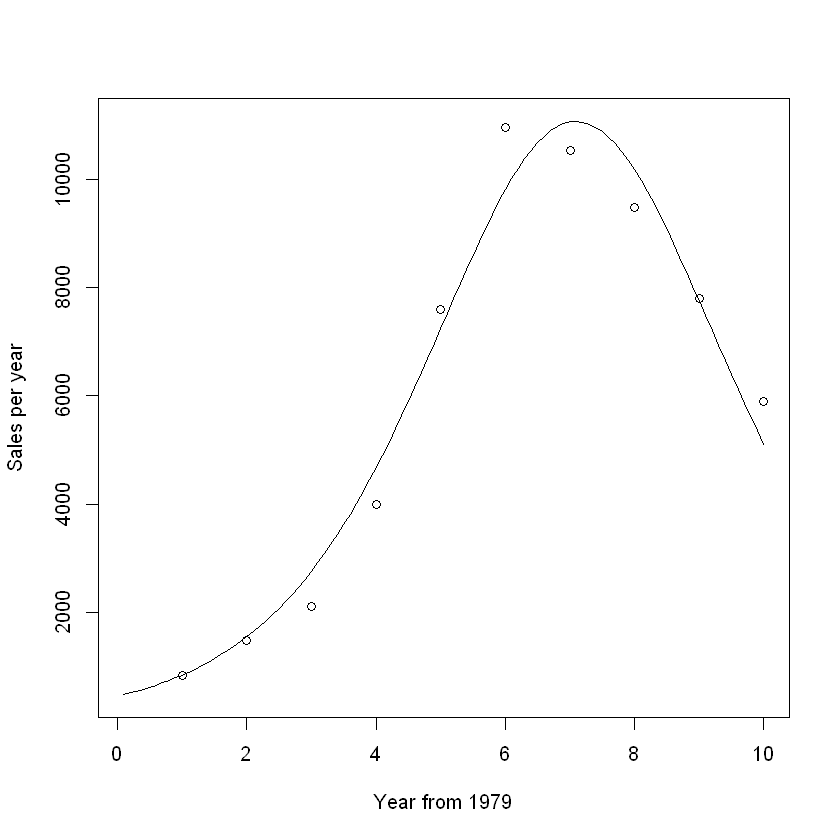

In [8]:
Bcoef <- coef(Bass.nls)
m <- Bcoef[1]
p <- Bcoef[2]
q <- Bcoef[3]
ngete <- exp(-(p+q) * Tdelt)
Bpdf <- m * ( (p+q)^2 / p ) * ngete / (1 + (q/p) * ngete)^2
plot(Tdelt, Bpdf, xlab = "Year from 1979",
                  ylab = "Sales per year", type='l')
points(T79, Sales)

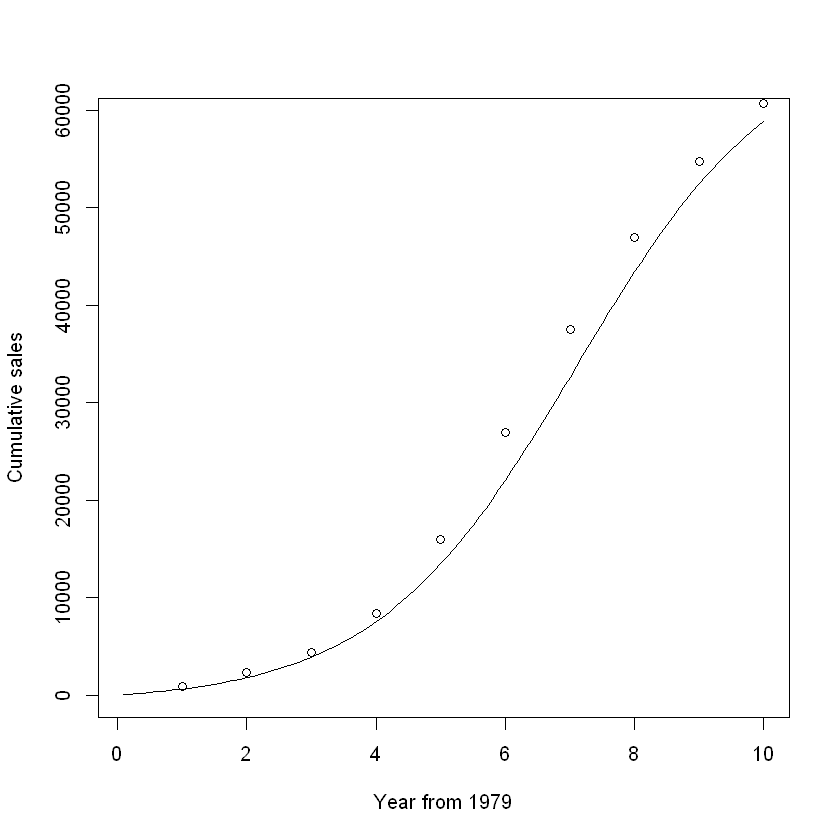

In [9]:
Bcdf <- m * (1 - ngete)/(1 + (q/p)*ngete)
plot(Tdelt, Bcdf, xlab = "Year from 1979",
                  ylab = "Cumulative sales", type='l')
points(T79, Cusales)

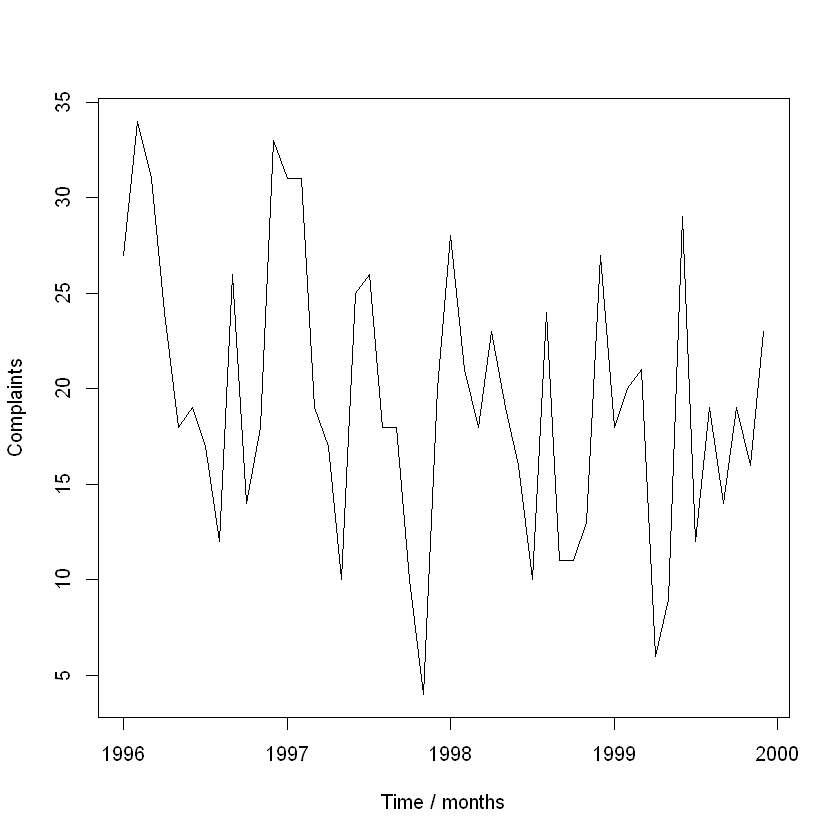

In [10]:
www <- 'https://raw.githubusercontent.com/prabeshdhakal/Introductory-Time-Series-with-R-Datasets/master/motororg.dat'

Motor.dat <- read.table(www, header = T); attach(Motor.dat)
Comp.ts <- ts(complaints, start = c(1996, 1), fr = 12)
plot(Comp.ts, xlab = "Time / months", ylab = "Complaints")

# There is no evidence of a systematic trend or seasonal effects, so it seems reasonable to use exponential smoothing
# for this time series. Exponential smoothing is a special case of the Holt-Winters algorithm


Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = complaints, beta = FALSE, gamma = FALSE)

Smoothing parameters:
 alpha: 0.1429622
 beta : FALSE
 gamma: FALSE

Coefficients:
      [,1]
a 17.70343

[1] 2502.028

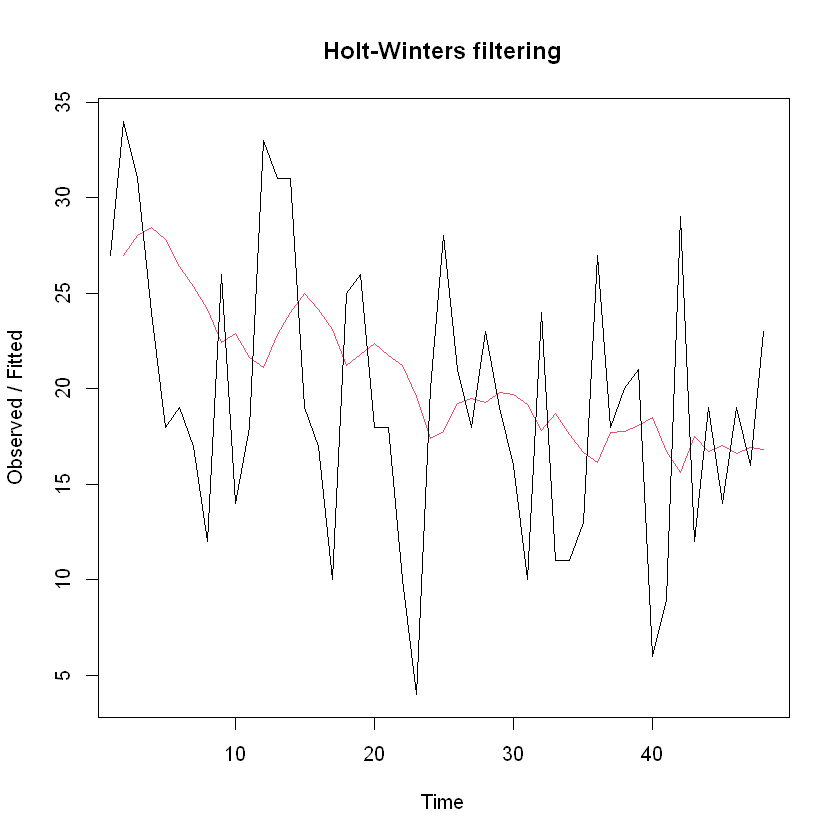

In [11]:
Comp.hw1 <- HoltWinters(complaints, beta = FALSE, gamma = FALSE); Comp.hw1
Comp.hw1$SSE
plot(Comp.hw1)

In [12]:
Comp.hw2 <- HoltWinters(complaints, alpha = 0.2, beta = FALSE, gamma = FALSE)
# acá le marco alpha=0.2
Comp.hw2

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = complaints, alpha = 0.2, beta = FALSE, gamma = FALSE)

Smoothing parameters:
 alpha: 0.2
 beta : FALSE
 gamma: FALSE

Coefficients:
      [,1]
a 17.97913

In [13]:
www <- 'https://raw.githubusercontent.com/prabeshdhakal/Introductory-Time-Series-with-R-Datasets/master/wine.dat'

wine.dat <- read.table(www, header = T) ; attach (wine.dat)
sweetw.ts <- ts(sweetw, start = c(1980,1), freq = 12)

In [14]:
head(wine.dat, n=3)

,winet,fortw,dryw,sweetw,red,rose,spark
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,2585,1954,85,464,112,1686
2,2,3368,2302,89,675,118,1591
3,3,3210,3054,109,703,129,2304


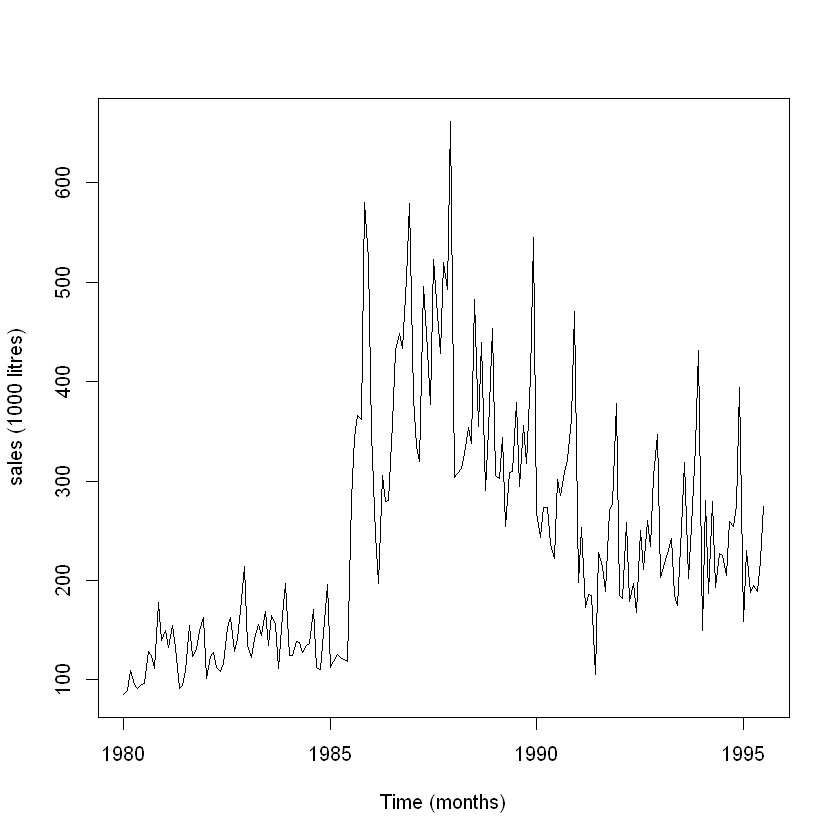

In [15]:
plot(sweetw.ts, xlab= "Time (months)", ylab = "sales (1000 litres)")

In [16]:
sweetw.hw <- HoltWinters (sweetw.ts, seasonal = "mult")
sweetw.hw ; sweetw.hw$coef ; sweetw.hw$SSE
sqrt(sweetw.hw$SSE/length(sweetw))
sd(sweetw)

Holt-Winters exponential smoothing with trend and multiplicative seasonal component.

Call:
HoltWinters(x = sweetw.ts, seasonal = "mult")

Smoothing parameters:
 alpha: 0.4086698
 beta : 0
 gamma: 0.4929402

Coefficients:
           [,1]
a   285.6890314
b     1.3509615
s1    0.9498541
s2    0.9767623
s3    1.0275900
s4    1.1991924
s5    1.5463100
s6    0.6730235
s7    0.8925981
s8    0.7557814
s9    0.8227500
s10   0.7241711
s11   0.7434861
s12   0.9472648

a           b          s1          s2          s3          s4 
285.6890314   1.3509615   0.9498541   0.9767623   1.0275900   1.1991924 
         s5          s6          s7          s8          s9         s10 
  1.5463100   0.6730235   0.8925981   0.7557814   0.8227500   0.7241711 
        s11         s12 
  0.7434861   0.9472648

[1] 477693.9

[1] 50.54219

[1] 121.3908

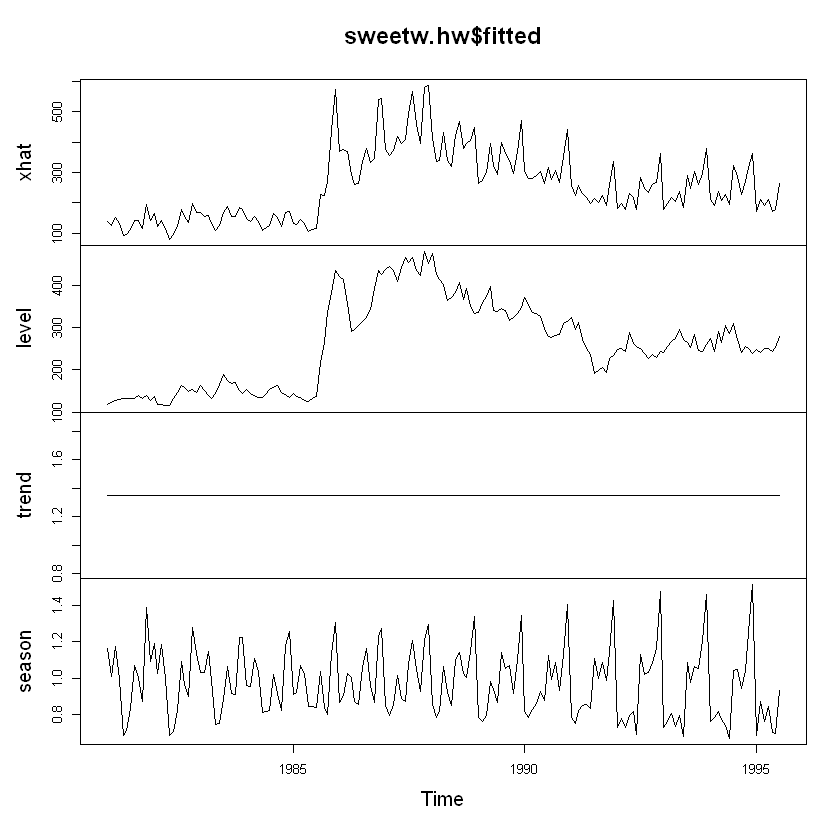

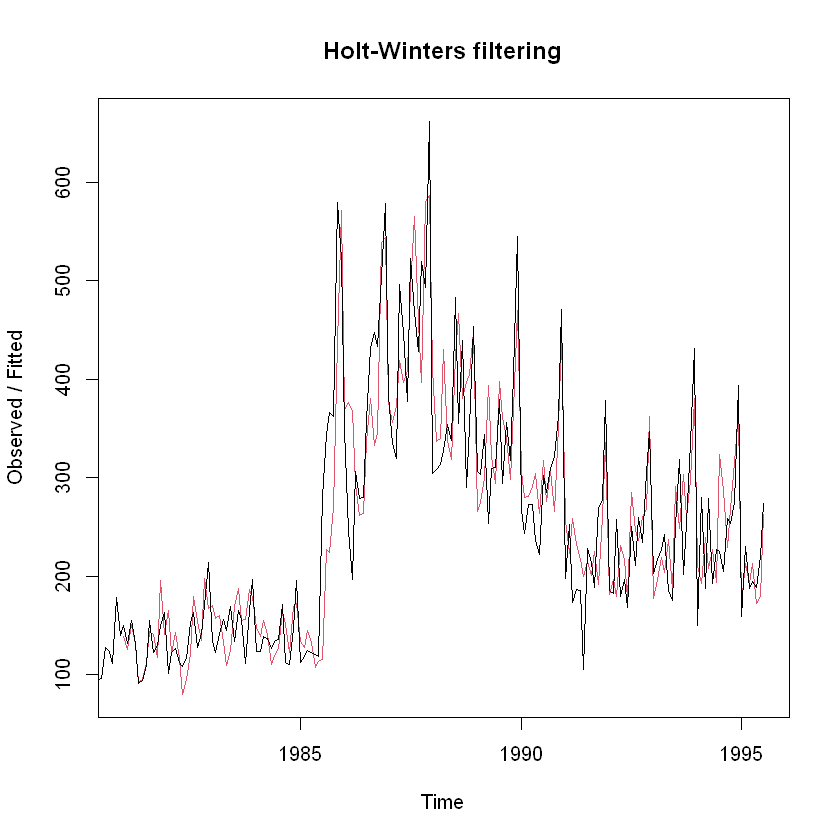

In [17]:
plot (sweetw.hw$fitted)
plot (sweetw.hw)

In [18]:
head(sweetw.hw$fitted, n=3)

xhat,level,trend,season
138.6608,117.9028,1.350962,1.162738
125.8447,123.2391,1.350962,1.010070
151.0674,127.0805,1.350962,1.176249


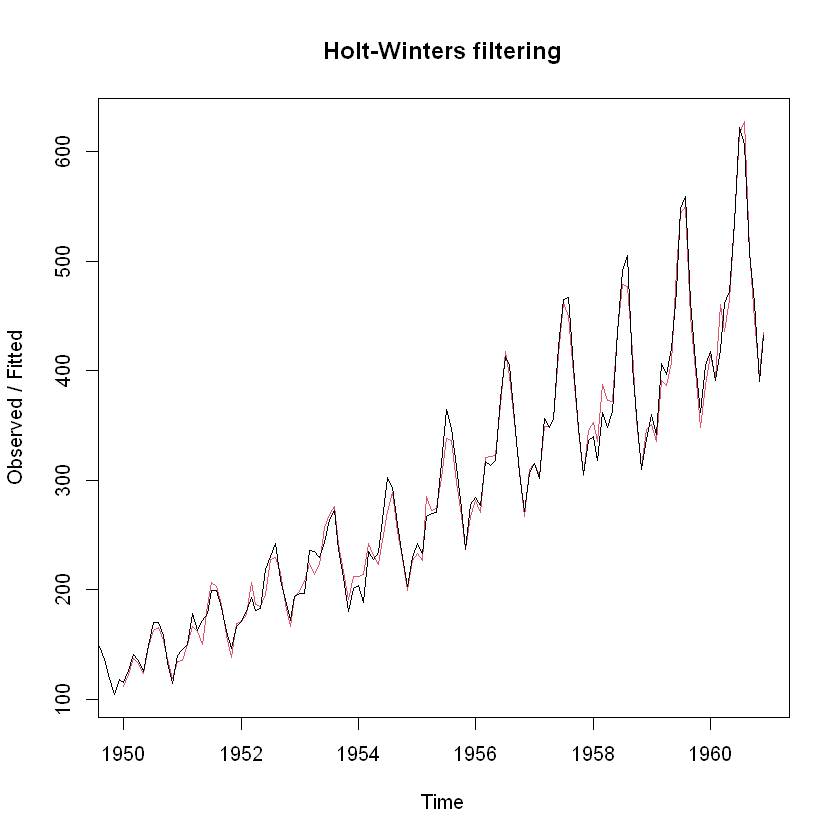

In [19]:
data(AirPassengers)
AP <- AirPassengers

AP.hw <- HoltWinters(AP, seasonal = "mult")
plot(AP.hw)

alpha 
0.2755925

beta 
0.03269295

gamma 
0.8707292

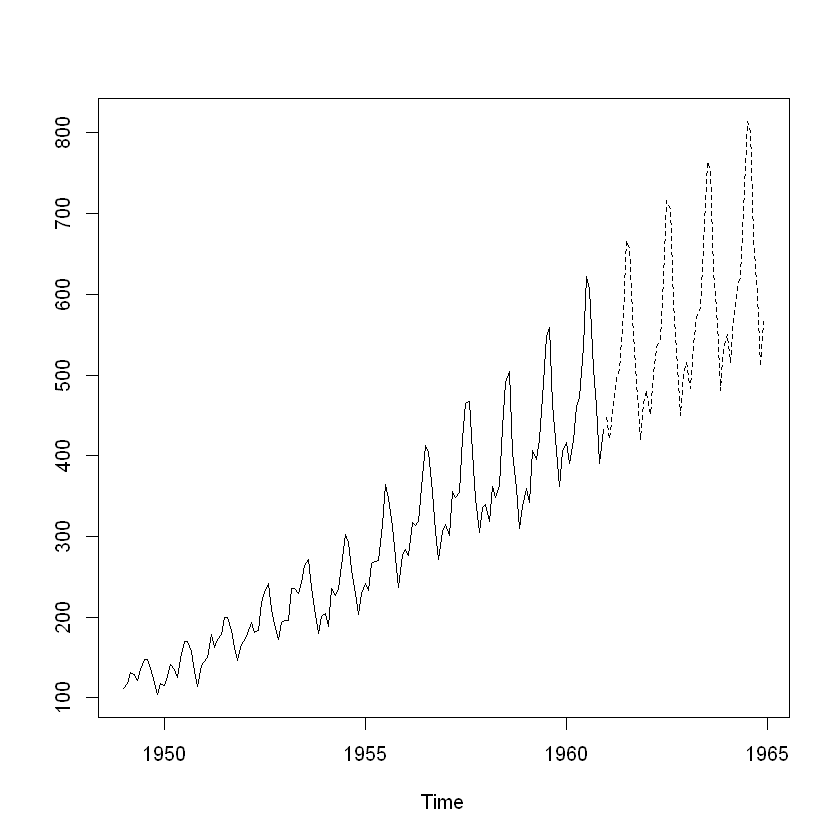

In [20]:
AP.predict <- predict(AP.hw, n.ahead = 4 * 12)# Esta está buena!!!
ts.plot(AP, AP.predict, lty = 1:2)

# The estimates of the model parameters:

AP.hw$alpha; AP.hw$beta; AP.hw$gamma

In [21]:
detach(Build.dat)
detach(Motor.dat)
detach (wine.dat)